In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset("Ozziey/poems_dataset")
df = pd.DataFrame(dataset['train'])
print(df.head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/171 [00:00<?, ?B/s]

final_df_emotions(remove-bias).csv:   0%|          | 0.00/400k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/450 [00:00<?, ? examples/s]

                                        poem content  pred    label     score  \
0  Let the bird of loudest lay\r\nOn the sole Ara...     5  sadness  0.650738   
1  Sir Charles into my chamber coming in,\r\nWhen...     0    anger  0.264296   
2  Our vice runs beyond all that old men saw,\r\n...     0    anger  0.758054   
3  Lo I the man, whose Muse whilome did maske,\r\...     0    anger  0.896280   
4  Long have I longd to see my love againe,\r\nSt...     5  sadness  0.600543   

      anger   disgust      fear       joy   neutral   sadness  surprise  \
0  0.133402  0.076618  0.094706  0.006762  0.032960  0.650738  0.004814   
1  0.264296  0.145707  0.057977  0.262715  0.019884  0.244457  0.004963   
2  0.758054  0.210444  0.003690  0.001755  0.013997  0.011483  0.000578   
3  0.896280  0.009259  0.004949  0.002320  0.007623  0.078088  0.001481   
4  0.027077  0.036344  0.075487  0.017212  0.187106  0.600543  0.056230   

           age                  type  
0  Renaissance  Mytholo

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## EDA

Some visualizations to analyze the dataset: it shows the distribution of emotions using a count plot, examines the variation in poem lengths with a histogram, and compares average scores across emotion labels using a bar plot. These insights help understand the dataset's structure and any patterns present.

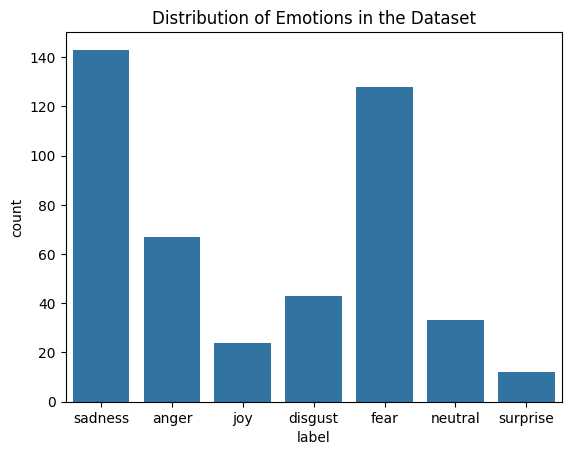

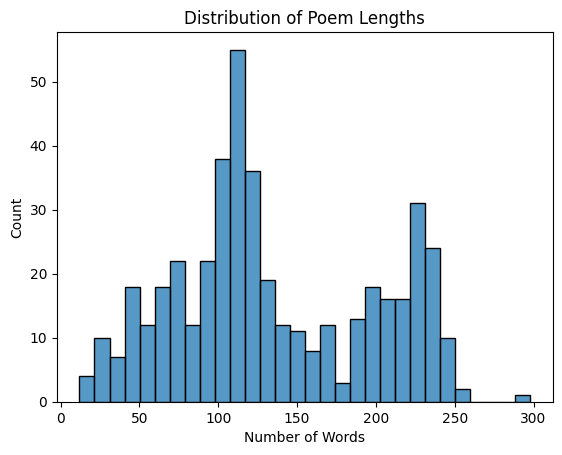

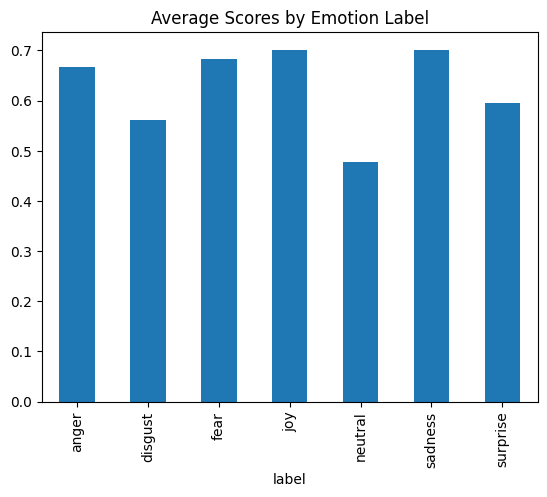

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=df)
plt.title('Distribution of Emotions in the Dataset')
plt.show()

df['poem_length'] = df['poem content'].apply(lambda x: len(x.split()))
sns.histplot(df['poem_length'], bins=30)
plt.title('Distribution of Poem Lengths')
plt.xlabel('Number of Words')
plt.show()

df.groupby('label')['score'].mean().plot(kind='bar')
plt.title('Average Scores by Emotion Label')
plt.show()


Preprocessing

In [5]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 83.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
import re
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\r\n', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_poem'] = df['poem content'].apply(preprocess_text)

def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]

df['tokens'] = df['cleaned_poem'].apply(tokenize_text)
print(df[['poem content', 'cleaned_poem', 'tokens']].head())


                                        poem content  \
0  Let the bird of loudest lay\r\nOn the sole Ara...   
1  Sir Charles into my chamber coming in,\r\nWhen...   
2  Our vice runs beyond all that old men saw,\r\n...   
3  Lo I the man, whose Muse whilome did maske,\r\...   
4  Long have I longd to see my love againe,\r\nSt...   

                                        cleaned_poem  \
0  let the bird of loudest lay on the sole arabia...   
1  sir charles into my chamber coming in when i w...   
2  our vice runs beyond all that old men saw and ...   
3  lo i the man whose muse whilome did maske as t...   
4  long have i longd to see my love againe still ...   

                                              tokens  
0  [let, the, bird, of, loudest, lay, on, the, so...  
1  [sir, charles, into, my, chamber, coming, in, ...  
2  [our, vice, runs, beyond, all, that, old, men,...  
3  [lo, i, the, man, whose, muse, whilome, did, m...  
4  [long, have, i, longd, to, see, my, love, agai..

Naive Bayes Model for Text Classification

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_poem'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        14
     disgust       0.00      0.00      0.00        12
        fear       0.38      0.70      0.49        23
         joy       0.00      0.00      0.00         8
     neutral       0.00      0.00      0.00         5
     sadness       0.40      0.72      0.51        25
    surprise       0.00      0.00      0.00         3

    accuracy                           0.38        90
   macro avg       0.11      0.20      0.14        90
weighted avg       0.21      0.38      0.27        90



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 N-Gram Model for Text Generation

In [8]:
from nltk.util import ngrams
from collections import defaultdict

def simple_tokenize(text):
    return text.split()

def train_ngram_model(poems, n=2):
    ngram_model = defaultdict(lambda: defaultdict(int))
    for poem in poems:
        tokens = simple_tokenize(poem)
        for i in range(len(tokens) - n):
            ngram_model[tuple(tokens[i:i + n - 1])][tokens[i + n - 1]] += 1
    return ngram_model

import random

def filter_poems_by_emotion(df, emotion):
    return df[df['label'] == emotion]['cleaned_poem']

def generate_poetic_text(ngram_model, seed_text, word_count):
    current_words = tuple(seed_text.split()[:2])
    generated_text = list(current_words)

    for _ in range(word_count - 2):
        if current_words in ngram_model:
            next_word = random.choices(
                list(ngram_model[current_words].keys()),
                list(ngram_model[current_words].values())
            )[0]
            generated_text.append(next_word)
            current_words = (current_words[1], next_word)
        else:
            break
    return ' '.join(generated_text)


In [9]:

emotion = "sadness"
word_count = 20
seed_text = "the moon is beautiful"

emotion_poems = filter_poems_by_emotion(df, emotion)
ngram_model = train_ngram_model(emotion_poems, n=3)

poetic_sentence = generate_poetic_text(ngram_model, seed_text, word_count)
print(poetic_sentence)


the moon thy wishes then dare not be not concernd study not why nor when do not so much honouring


In [10]:
emotion = "joy"
word_count <= 20
seed_text = "the moon is beautiful"

emotion_poems = filter_poems_by_emotion(df, emotion)
ngram_model = train_ngram_model(emotion_poems, n=3)

poetic_sentence = generate_poetic_text(ngram_model, seed_text, word_count)
print(poetic_sentence)

the moon nocturnal cyclops crystal concubine pocked with personification the fossil virgin of the purest gold a belt of straw


RNN and LSTM Models

In [11]:
import torch
import torch.nn as nn

def build_vocab(texts):
    word_to_idx = {}
    idx_to_word = {}
    idx = 0
    for text in texts:
        for word in text.split():
            if word not in word_to_idx:
                word_to_idx[word] = idx
                idx_to_word[idx] = word
                idx += 1
    return word_to_idx, idx_to_word

def filter_and_prepare_data(df, emotion):
    poems = df[df['label'] == emotion]['cleaned_poem'].tolist()
    word_to_idx, idx_to_word = build_vocab(poems)
    return poems, word_to_idx, idx_to_word

def sentence_to_indices(sentence, word_to_idx):
    return [word_to_idx[word] for word in sentence.split() if word in word_to_idx]

def generate_text(model, seed_text, word_count, idx_to_word, word_to_idx, device):
    model.eval()
    words = seed_text.split()
    input_indices = torch.tensor([sentence_to_indices(seed_text, word_to_idx)], device=device)

    for _ in range(word_count - len(words)):
        with torch.no_grad():
            output = model(input_indices)
            _, predicted = torch.max(output, dim=1)
            next_word = idx_to_word[predicted.item()]
            words.append(next_word)
            input_indices = torch.tensor([[predicted.item()]], device=device)

    return ' '.join(words)

class RNNModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.RNN(embed_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.embedding(x)
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Training Session

In [12]:

emotion = "sadness"
seed_text = "the moon is beautiful"
word_count = 20

poems, word_to_idx, idx_to_word = filter_and_prepare_data(df, emotion)
vocab_size = len(word_to_idx)

embed_size = 128
hidden_size = 256
output_size = vocab_size

rnn_model = RNNModel(vocab_size, embed_size, hidden_size, output_size).to(device)
lstm_model = LSTMModel(vocab_size, embed_size, hidden_size, output_size).to(device)

poetic_sentence_rnn = generate_text(rnn_model, seed_text, word_count, idx_to_word, word_to_idx, device)
print("RNN Generated Text with Emotion:", poetic_sentence_rnn)

poetic_sentence_lstm = generate_text(lstm_model, seed_text, word_count, idx_to_word, word_to_idx, device)
print("LSTM Generated Text with Emotion:", poetic_sentence_lstm)


RNN Generated Text with Emotion: the moon is beautiful unlocked reverend mummy sings liquido judging phlegm space sakes pitkin unusd chilled em pity sommers ordinary
LSTM Generated Text with Emotion: the moon is beautiful graves concernd didst dulls dwelling lighting catolicismosounded mixd perform prima asunder celestial release remedy amorous height


In [13]:

emotion = "joy"
seed_text = "the moon is beautiful"
word_count = 20

poems, word_to_idx, idx_to_word = filter_and_prepare_data(df, emotion)
vocab_size = len(word_to_idx)

embed_size = 128
hidden_size = 256
output_size = vocab_size

rnn_model = RNNModel(vocab_size, embed_size, hidden_size, output_size).to(device)
lstm_model = LSTMModel(vocab_size, embed_size, hidden_size, output_size).to(device)

poetic_sentence_rnn = generate_text(rnn_model, seed_text, word_count, idx_to_word, word_to_idx, device)
print("RNN Generated Text with Emotion:", poetic_sentence_rnn)

poetic_sentence_lstm = generate_text(lstm_model, seed_text, word_count, idx_to_word, word_to_idx, device)
print("LSTM Generated Text with Emotion:", poetic_sentence_lstm)


RNN Generated Text with Emotion: the moon is beautiful blood blooms pod citadels smiling spirit frank crystal beaver flock shun makes faith as where my
LSTM Generated Text with Emotion: the moon is beautiful lusts eternity hereafter flowers queer play queer play queer play queer play queer play queer play


In [16]:

emotion = "anger"
seed_text = "the moon is beautiful"
word_count = 20

poems, word_to_idx, idx_to_word = filter_and_prepare_data(df, emotion)
vocab_size = len(word_to_idx)

embed_size = 128
hidden_size = 256
output_size = vocab_size

rnn_model = RNNModel(vocab_size, embed_size, hidden_size, output_size).to(device)
lstm_model = LSTMModel(vocab_size, embed_size, hidden_size, output_size).to(device)

poetic_sentence_rnn = generate_text(rnn_model, seed_text, word_count, idx_to_word, word_to_idx, device)
print("RNN Generated Text with Emotion:", poetic_sentence_rnn)

poetic_sentence_lstm = generate_text(lstm_model, seed_text, word_count, idx_to_word, word_to_idx, device)
print("LSTM Generated Text with Emotion:", poetic_sentence_lstm)


RNN Generated Text with Emotion: the moon is beautiful bold ended throw firm glance vulgar deaths all needless ladies hills drunken spoiles spoiles spoiles spoiles
LSTM Generated Text with Emotion: the moon is beautiful lightning begin glance workmaster lookd two brought immortal feeds shook case said spoke unuttered quickly ungrateful


In [17]:

emotion = "disgust"
seed_text = "the moon is beautiful"
word_count = 20

poems, word_to_idx, idx_to_word = filter_and_prepare_data(df, emotion)
vocab_size = len(word_to_idx)

embed_size = 128
hidden_size = 256
output_size = vocab_size

rnn_model = RNNModel(vocab_size, embed_size, hidden_size, output_size).to(device)
lstm_model = LSTMModel(vocab_size, embed_size, hidden_size, output_size).to(device)

poetic_sentence_rnn = generate_text(rnn_model, seed_text, word_count, idx_to_word, word_to_idx, device)
print("RNN Generated Text with Emotion:", poetic_sentence_rnn)

poetic_sentence_lstm = generate_text(lstm_model, seed_text, word_count, idx_to_word, word_to_idx, device)
print("LSTM Generated Text with Emotion:", poetic_sentence_lstm)


RNN Generated Text with Emotion: the moon is beautiful web cheese gravel sacrifice wooden such guns ancient ease escape floats kept vain gorge recitals thence
LSTM Generated Text with Emotion: the moon is beautiful living busied lone die own a imported shovings lost brings now comes debris lone die own


In [18]:

emotion = "fear"
seed_text = "the moon is beautiful"
word_count = 20

poems, word_to_idx, idx_to_word = filter_and_prepare_data(df, emotion)
vocab_size = len(word_to_idx)

embed_size = 128
hidden_size = 256
output_size = vocab_size

rnn_model = RNNModel(vocab_size, embed_size, hidden_size, output_size).to(device)
lstm_model = LSTMModel(vocab_size, embed_size, hidden_size, output_size).to(device)

poetic_sentence_rnn = generate_text(rnn_model, seed_text, word_count, idx_to_word, word_to_idx, device)
print("RNN Generated Text with Emotion:", poetic_sentence_rnn)

poetic_sentence_lstm = generate_text(lstm_model, seed_text, word_count, idx_to_word, word_to_idx, device)
print("LSTM Generated Text with Emotion:", poetic_sentence_lstm)


RNN Generated Text with Emotion: the moon is beautiful bracts rein placed foresees trinkets reasons cymbal stadium slain print peachtrees surprise lived ancestral hurled spasm
LSTM Generated Text with Emotion: the moon is beautiful almost quivering everywhere madman repent altars touch seeds foraminous wintry woo wilt sick ashes prayed needles


In [19]:

emotion = "neutral"
seed_text = "the moon is beautiful"
word_count = 20

poems, word_to_idx, idx_to_word = filter_and_prepare_data(df, emotion)
vocab_size = len(word_to_idx)

embed_size = 128
hidden_size = 256
output_size = vocab_size

rnn_model = RNNModel(vocab_size, embed_size, hidden_size, output_size).to(device)
lstm_model = LSTMModel(vocab_size, embed_size, hidden_size, output_size).to(device)

poetic_sentence_rnn = generate_text(rnn_model, seed_text, word_count, idx_to_word, word_to_idx, device)
print("RNN Generated Text with Emotion:", poetic_sentence_rnn)

poetic_sentence_lstm = generate_text(lstm_model, seed_text, word_count, idx_to_word, word_to_idx, device)
print("LSTM Generated Text with Emotion:", poetic_sentence_lstm)


RNN Generated Text with Emotion: the moon is beautiful becomes almost stains they power fatalists dipped nothing flowing moved rugged secrecy willow course waits sexlife
LSTM Generated Text with Emotion: the moon is beautiful history fix loose overwrought substance got amber zebragrass their owe pair taste victims white owe pair


In [20]:

emotion = "surprise"
seed_text = "the moon is beautiful"
word_count = 20

poems, word_to_idx, idx_to_word = filter_and_prepare_data(df, emotion)
vocab_size = len(word_to_idx)

embed_size = 128
hidden_size = 256
output_size = vocab_size

rnn_model = RNNModel(vocab_size, embed_size, hidden_size, output_size).to(device)
lstm_model = LSTMModel(vocab_size, embed_size, hidden_size, output_size).to(device)

poetic_sentence_rnn = generate_text(rnn_model, seed_text, word_count, idx_to_word, word_to_idx, device)
print("RNN Generated Text with Emotion:", poetic_sentence_rnn)

poetic_sentence_lstm = generate_text(lstm_model, seed_text, word_count, idx_to_word, word_to_idx, device)
print("LSTM Generated Text with Emotion:", poetic_sentence_lstm)


RNN Generated Text with Emotion: the moon is beautiful exchange are praises want fire charon brightness base live watery ship lutanists creeds resound complexes thin
LSTM Generated Text with Emotion: the moon is beautiful together stopped pennies arrows about threading o myringa flames comes pennies arrows about threading o myringa


In [21]:
# Generate text using RNN
seed_text = "the moon is beautiful"
print("\nGenerated Text with RNN:")
print(generate_text(rnn_model, seed_text, word_count=30, idx_to_word=idx_to_word, word_to_idx=word_to_idx, device=device))

# Generate text using LSTM
print("\nGenerated Text with LSTM:")
print(generate_text(lstm_model, seed_text, word_count=30, idx_to_word=idx_to_word, word_to_idx=word_to_idx, device=device))


Generated Text with RNN:
the moon is beautiful exchange are praises want fire charon brightness base live watery ship lutanists creeds resound complexes thin thin thin thin thin thin thin thin thin thin thin

Generated Text with LSTM:
the moon is beautiful together stopped pennies arrows about threading o myringa flames comes pennies arrows about threading o myringa flames comes pennies arrows about threading o myringa flames comes


In [22]:

emotion = "joy"
seed_text = "the moon is beautiful"
word_count = 30

poems, word_to_idx, idx_to_word = filter_and_prepare_data(df, emotion)
vocab_size = len(word_to_idx)

embed_size = 128
hidden_size = 256
output_size = vocab_size

rnn_model = RNNModel(vocab_size, embed_size, hidden_size, output_size).to(device)
lstm_model = LSTMModel(vocab_size, embed_size, hidden_size, output_size).to(device)

poetic_sentence_rnn = generate_text(rnn_model, seed_text, word_count, idx_to_word, word_to_idx, device)
print("RNN Generated Text with Emotion:", poetic_sentence_rnn)

poetic_sentence_lstm = generate_text(lstm_model, seed_text, word_count, idx_to_word, word_to_idx, device)
print("LSTM Generated Text with Emotion:", poetic_sentence_lstm)


RNN Generated Text with Emotion: the moon is beautiful beggar doubleness droning hear hearts flow concubine house purely lips thoo though dreamer gave lark pod oxidized youths bitter makes heavens posthumous wifey shun meadow outright
LSTM Generated Text with Emotion: the moon is beautiful becomes triumphs eternity tress citadels faith both lives winds delirious luscious iope swains comes strength shining eternity tress citadels faith both lives winds delirious luscious iope


Transformers Model

In [23]:
!pip install transformers datasets torch


In [24]:
import pandas as pd
from datasets import load_dataset
from transformers import GPT2LMHeadModel, GPT2Tokenizer, TextDataset, DataCollatorForLanguageModeling, Trainer, TrainingArguments

dataset = load_dataset("Ozziey/poems_dataset")
df = pd.DataFrame(dataset['train'])

def prepare_dataset(poems, labels):
    return [f"<bos> {label} {poem} <eos>" for label, poem in zip(labels, poems)]

poems = df['poem content'].tolist()
labels = df['label'].tolist()
formatted_texts = prepare_dataset(poems, labels)

with open("/content/drive/MyDrive/IA653_Natural_Language_Processing/poem_dataset.txt", "w") as f:
    f.write("\n".join(formatted_texts))

model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

special_tokens = {'pad_token': '<pad>', 'bos_token': '<bos>', 'eos_token': '<eos>'}
tokenizer.add_special_tokens(special_tokens)
model.resize_token_embeddings(len(tokenizer))

def load_poem_dataset(file_path, tokenizer, block_size=128):
    return TextDataset(
        tokenizer=tokenizer,
        file_path=file_path,
        block_size=block_size
    )

train_dataset = load_poem_dataset("/content/drive/MyDrive/IA653_Natural_Language_Processing/poem_dataset.txt", tokenizer)

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False
)

training_args = TrainingArguments(
    output_dir="./poetry-transformer",
    overwrite_output_dir=True,
    num_train_epochs=5,
    per_device_train_batch_size=4,
    save_steps=500,
    save_total_limit=2,
    logging_dir="./logs",
    logging_steps=50,
    learning_rate=5e-5,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
)

trainer.train()

model.save_pretrained("./poetry-transformer")
tokenizer.save_pretrained("./poetry-transformer")

def generate_poem(seed_text, emotion, model, tokenizer, max_length=50):
    model.eval()
    input_text = f"<bos> {emotion} {seed_text}"
    input_ids = tokenizer.encode(input_text, return_tensors="pt").to(model.device)

    output = model.generate(
        input_ids=input_ids,
        max_length=max_length,
        num_return_sequences=1,
        temperature=0.7,
        top_k=50,
        top_p=0.9,
        pad_token_id=tokenizer.pad_token_id,
        eos_token_id=tokenizer.eos_token_id
    )
    return tokenizer.decode(output[0], skip_special_tokens=True)

emotion = "joy"
seed_text = "the moon is beautiful"
generated_poem = generate_poem(seed_text, emotion, model, tokenizer)
print("Generated Poem with Emotion:")
print(generated_poem)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
/usr/local/lib/python3.10/dist-packages/transformers/data/datasets/language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss
50,4.487900
100,4.425700
150,4.324800
200,4.348700
250,4.058200
300,3.920600
350,3.911800
400,3.933700
450,3.744800
500,3.741300


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:595: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


Generated Poem with Emotion:
 joy the moon is beautiful,
And the stars are bright,
And the moon is full of light. 


In [27]:
emotion = "sadness"
seed_text = "the moon is beautiful"
generated_poem = generate_poem(seed_text, emotion, model, tokenizer)
print(f"Generated Poem with Emotion: {emotion}\n {generated_poem}")

Generated Poem with Emotion: sadness
  sadness the moon is beautiful
And the stars are bright and clear
And the moon is full of love
                           


In [30]:
emotion = "fear"
seed_text = "the moon is beautiful"
generated_poem = generate_poem(seed_text, emotion, model, tokenizer)
print(f"Generated Poem with Emotion: {emotion}\n {generated_poem}")

Generated Poem with Emotion: fear
  fear the moon is beautiful
And the stars are not so bright
As to make them seem so dark.

But the moon is beautiful, and the stars are not so bright
As to make them seem so dark.

But


In [32]:
emotion = "disgust"
seed_text = "the moon is beautiful"
generated_poem = generate_poem(seed_text, emotion, model, tokenizer)
print(f"Generated Poem with Emotion: {emotion}\n {generated_poem}")

Generated Poem with Emotion: disgust
  disgust the moon is beautiful
And the stars are not so bright
As to make them seem so bright
                           


In [33]:
emotion = "neutral"
seed_text = "the moon is beautiful"
generated_poem = generate_poem(seed_text, emotion, model, tokenizer)
print(f"Generated Poem with Emotion: {emotion}\n {generated_poem}")

Generated Poem with Emotion: neutral
  neutral the moon is beautiful
And the stars are bright and clear
And the moon is warm and clear
                           


In [34]:
emotion = "surprise"
seed_text = "the moon is beautiful"
generated_poem = generate_poem(seed_text, emotion, model, tokenizer)
print(f"Generated Poem with Emotion: {emotion}\n {generated_poem}")

Generated Poem with Emotion: surprise
  surprise the moon is beautiful
And the stars are bright and clear
And the moon is full of love
                           


In [35]:
emotion = "anger"
seed_text = "the moon is beautiful"
generated_poem = generate_poem(seed_text, emotion, model, tokenizer)
print(f"Generated Poem with Emotion: {emotion}\n {generated_poem}")

Generated Poem with Emotion: anger
  anger the moon is beautiful
And the stars are not so bright
As to make them seem so bright
                           


In [36]:
def save_model(model, model_name):
    save_path = f"/content/drive/MyDrive/IA653_Natural_Language_Processing/{model_name}.pth"
    torch.save(model.state_dict(), save_path)
    print(f"Model saved to {save_path}")

In [37]:
save_model(rnn_model, "rnn_model")
save_model(lstm_model, "lstm_model")

Model saved to /content/drive/MyDrive/IA653_Natural_Language_Processing/rnn_model.pth
Model saved to /content/drive/MyDrive/IA653_Natural_Language_Processing/lstm_model.pth
